### Problema do Padrão Bidimensional
- Considere o problema de classificação de padrões bidimensionais constituído neste caso
de 5 padrões.
- A distribuição dos padrões tem como base um quadrado centrado na origem
interceptando os eixos nos pontos +1 e -1 de cada eixo.
- Os pontos +1 e -1 de cada eixo são centros de quatro semicírculos que se interceptam no interior do quadrado originando uma classe e as outras quatro classes nas regiões de não interseção.
- Após gerar aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto de treinamento e um conjunto de validação.
- Treine uma rede neural Deep MLP

- a) Verifique o desempenho do classificador usando o conjunto de validação e calculando a
matriz de confusão.
- b) Compare o desempenho com a solução obtida na lista com a técnica Random Forrest.

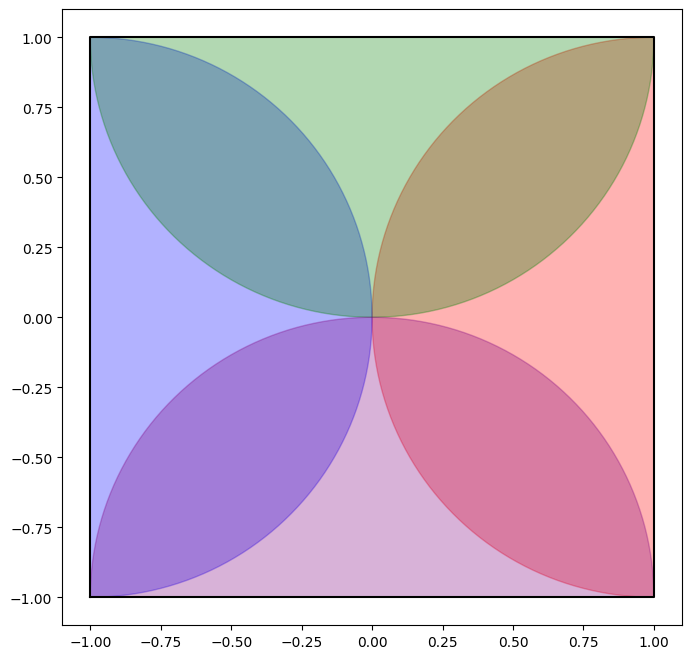

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Função para verificar se um ponto está dentro do semicírculo
def in_semicircle(x, y, cx, cy):
    if cx != 0:
        return (x - cx)**2 + (y - cy)**2 <= 1
    else:
        return (x - cx)**2 + (y - cy)**2 <= 1

def draw_semicircle(ax, center, radius, orientation, color):
    theta = np.linspace(0, np.pi, 100)
    if orientation == 'left':
        x = center[0] + radius * (np.sin(theta))
        y = center[1] + radius * (np.cos(theta))
    elif orientation == 'up':
        x = center[0] - radius * np.cos(theta)
        y = center[1] + radius * np.sin(theta)
    elif orientation == 'right':
        x = center[0] + radius * (-np.sin(theta))
        y = center[1] - radius * (np.cos(theta))
    elif orientation == 'down':
        x = center[0] + radius * np.cos(theta)
        y = center[1] - radius * np.sin(theta)
    ax.fill(x, y, color=color, alpha=0.3)



# Visualização dos dados gerados
plt.figure(figsize=(8, 8))

# Desenhar o quadrado
plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'k-')

# Desenhar os semicírculos
ax = plt.gca()
draw_semicircle(ax, (1, 0), 1, 'right', 'red')
draw_semicircle(ax, (-1, 0), 1, 'left', 'blue')
draw_semicircle(ax, (0, 1), 1, 'down', 'green')
draw_semicircle(ax, (0, -1), 1, 'up', 'purple')

[[ 0.50392632  0.62402082]
 [-0.74484053  0.85612704]
 [-0.85124893  0.30825651]
 ...
 [-0.87926445 -0.80740161]
 [-0.31728755  0.77398974]
 [ 0.38982442 -0.90901341]]
[1. 3. 0. ... 4. 0. 0.]


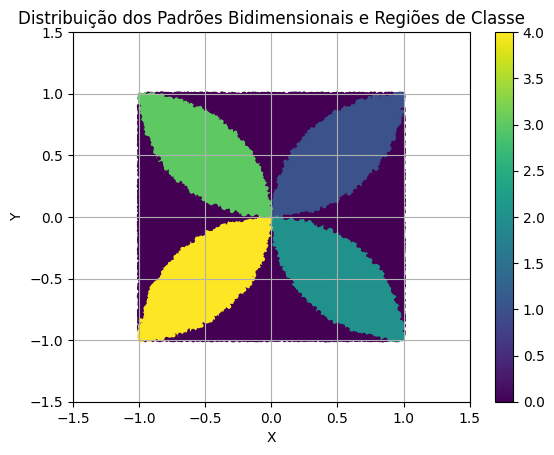

In [2]:
# Definir o número de pontos para cada classe
n_points = 10000
# Gerar pontos aleatórios no quadrado [-1, 1] x [-1, 1]
points = np.random.uniform(-1, 1, (n_points * 5, 2))
labels = np.zeros((n_points * 5,))
# Atribuir rótulos às classes
for i, (x, y) in enumerate(points):
    if in_semicircle(x, y, 1, 0) and in_semicircle(x, y, -1, 0) and in_semicircle(x, y, 0, 1) and in_semicircle(x, y, 0, -1):
        labels[i] = 0
    elif in_semicircle(x, y, 1, 0) and in_semicircle(x, y, 0, 1):
        labels[i] = 1
    elif in_semicircle(x, y, 1, 0) and in_semicircle(x, y, 0, -1):
        labels[i] = 2
    elif in_semicircle(x, y, 0, 1) and in_semicircle(x, y, -1, 0):
        labels[i] = 3
    elif in_semicircle(x, y, 0, -1) and in_semicircle(x, y, -1, 0):
        labels[i] = 4
print(points)
print(labels)
# Desenhar os semicírculos
ax = plt.gca()
draw_semicircle(ax, (1, 0), 1, 'right', 'red')
draw_semicircle(ax, (-1, 0), 1, 'left', 'blue')
draw_semicircle(ax, (0, 1), 1, 'down', 'green')
draw_semicircle(ax, (0, -1), 1, 'up', 'purple')
# Plotar os pontos
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', s=5)
plt.colorbar()
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Distribuição dos Padrões Bidimensionais e Regiões de Classe')
plt.grid(True)
plt.show()

In [3]:
# Dividir os dados em treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(points, labels, test_size=0.2, random_state=42, stratify=labels)


In [4]:
# Definir a arquitetura da rede neural
model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(5, activation='softmax')
])

# Compilar o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

# Avaliar o desempenho no conjunto de validação
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


Epoch 1/100
1250/1250 [==============================] - 15s 7ms/step - loss: 0.3324 - accuracy: 0.8648 - val_loss: 0.1650 - val_accuracy: 0.9366
Epoch 2/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1272 - accuracy: 0.9524 - val_loss: 0.1035 - val_accuracy: 0.9594
Epoch 3/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.1034 - accuracy: 0.9601 - val_loss: 0.0841 - val_accuracy: 0.9659
Epoch 4/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0912 - accuracy: 0.9634 - val_loss: 0.0770 - val_accuracy: 0.9687
Epoch 5/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0803 - accuracy: 0.9684 - val_loss: 0.0680 - val_accuracy: 0.9734
Epoch 6/100
1250/1250 [==============================] - 3s 3ms/step - loss: 0.0770 - accuracy: 0.9682 - val_loss: 0.0774 - val_accuracy: 0.9659
Epoch 7/100
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0745 - accuracy: 0.9696 - val_loss: 0.0787 - val_a

313/313 [==============================] - 1s 2ms/step


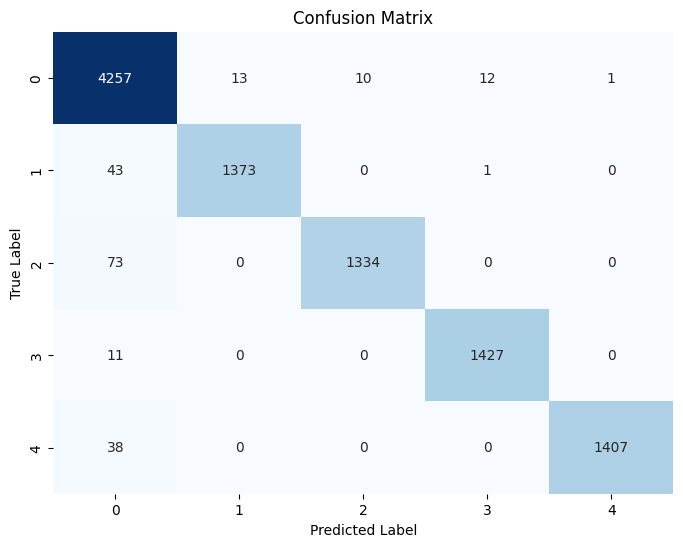

In [5]:
# Fazer previsões no conjunto de teste
y_pred = np.argmax(model.predict(X_val), axis=1)

# Calcular a matriz de confusão
conf_mat = confusion_matrix(y_val, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

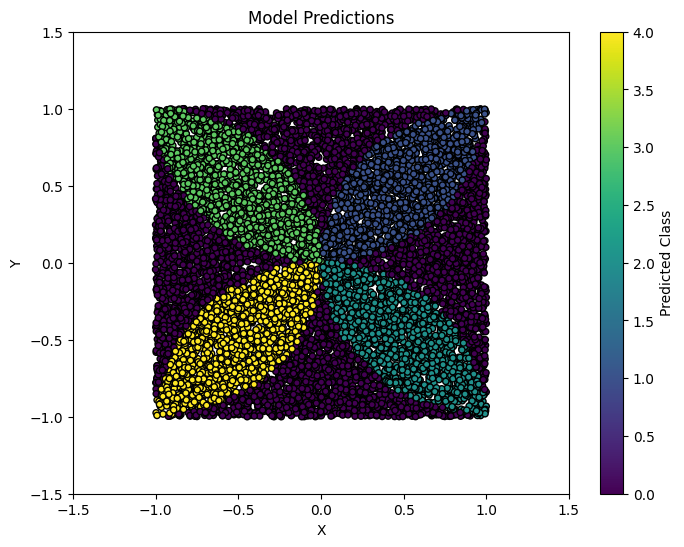

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_pred, cmap='viridis', s=20, edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Predictions')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.colorbar(label='Predicted Class')
plt.show()

#### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 2. Importar o Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Treinamento do Modelo
modelo.fit(X_train, y_train)

# 4. Previsões no Conjunto de Teste
y_pred = modelo.predict(X_val)

# 5. Avaliação do Modelo
acuracia = accuracy_score(y_val, y_pred)
print("Accuracy:", acuracia)

Accuracy: 0.9895


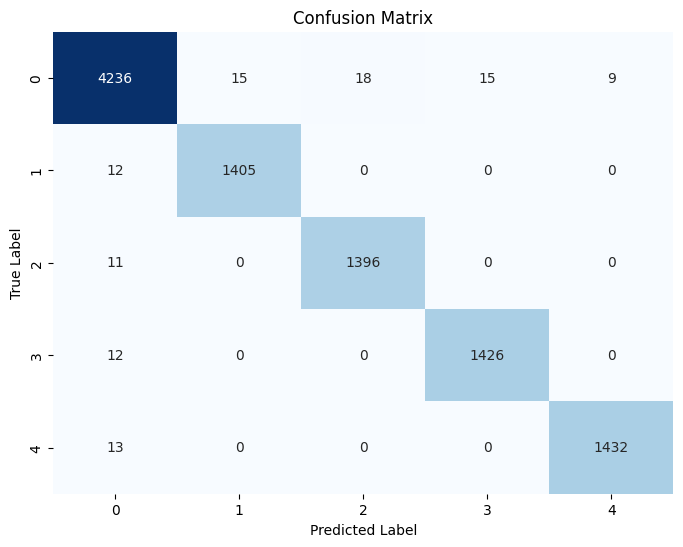

In [8]:
conf_mat = confusion_matrix(y_val, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

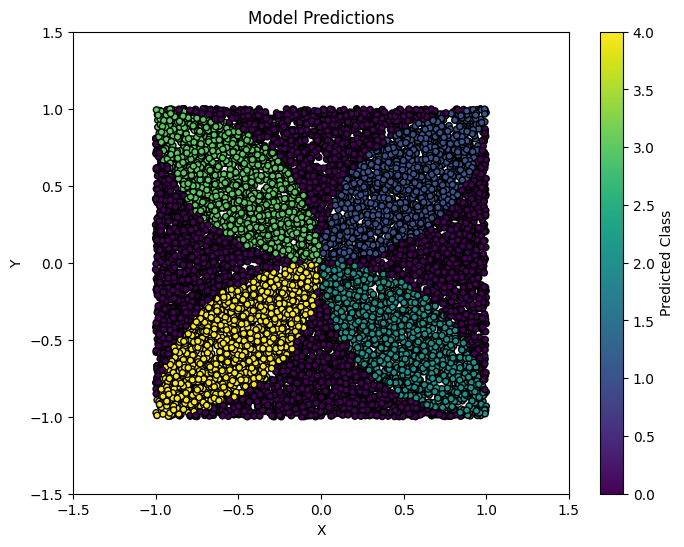

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_pred, cmap='viridis', s=20, edgecolor='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Predictions')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.colorbar(label='Predicted Class')
plt.show()

### Conclusão
- O algoritmo de Random Forest por ser menos sensível a variabilidade dos dados e conseguir lidar com generalização, apresentou os mesmos ou melhores resultados do que os obtidos com a MLP. Sendo assim, dependendo da usabilidade que se tenha, ambos os algoritmos são opções para aplicar. Ademais, é importante que se verifique qual apresenta menos custo computacional.